# Fitting data -- Least Squares -- Interpolation-- Extrapolation

In [1]:
## PHZ3150 Fall 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Assume you have this dataset:

<img src="least_sq_data1.png" width=550 height=250 />

### You know that the data should follow an equation of the form:

y = a*x +b 

### but, how do you find the best-fit model? 


### One way would be to try different models, use different a and b parameters and see which one fits the data best right? Let’s try different models of this form:


<img src="least_sq_data2.png" width=550 height=250 />

### which one is the best? 


### We need a way to quantify what "best-fit" model means 

### $\Sigma_i  \frac{(O_i - E_i )^2}{E_i}$ 

#### where, $O_i$ is our data and $E_i$ the expected model points

#### --> we minimize the sum of the squares of the offsets ("the residuals") of the points from the curve; The smaller $R^2$  is, the better the  model fits the data!

<img src="least_sq_data3.png" width=550 height=250 />

### So far we ignored that our data can have an error bar. Assuming that the data/measurements are independent of each other and that they are normally distributed, if we have N independent variables $y_i$ with mean $\mu_i$ and variance $\sigma^2_i$, we can define $\chi^2$ as :

### $\chi^2$ = $\Sigma \frac{(y_i - \mu_i)^2}{\sigma^2_i}$

#### Note that the error we fit is in the y dimension; we assume that the mean x position is accurate. If $y$ data follow a gaussian (i.e., normal) distribution this process is the chi-square minimization and is the same as least squares fitting – if not you do a least squares 

#### the premise of the $\chi^2$ test is that the deviations from the model are due to statistical fluctuations due to our limited numbers of observations per bin, i.e. we deal with "noise" or Poisson statistics


#### Important to remember are the  degrees of freedom (dof) : 

$n = N_{data-points} – N_{fitted-parameters}$

#### You want $\chi^2 / n < 1 $


### General form:

## $\chi ^2 = \Sigma w_i  (y_i - f_i)^2 $

#### where weight $w_i$ can be:

- $\frac{1}{\sigma_i}$ 

- $\frac{1}{f_i}$ 

#### If observations are correlated we need to calculate the ‘covariance matrix’


#### Let's try to do some fitting of our own now:

In [2]:
x = np.arange(1,22,1)
y = np.array([ 6.89632026, 11.93880672 ,18.51618226, 15.32061411, 23.5375446,  21.62910794,
 18.6627083,  24.86024463, 28.89751315, 32.41984013, 30.96236269, 33.45884498,
 39.66476063, 34.761296,   39.17902872, 39.13987917, 41.04070812, 47.65140802,
 48.76335871, 46.62044392, 53.46507287])

#### make a model of the form y_theoretical = ax + b 
#### then scan different values of a and b; calculate chi2 (initially in form (y-ytheory)**2/y_theory) and find the minimum


In [3]:
a = np.arange( 0.1, 8, 0.1 )
b = np.arange( 0.1, 10 , 0.1 ) 

In [4]:
chi_square = np.zeros( ( len( a ), len( b ) ) )

for i in range( len( a ) ):
    for j in range( len( b ) ):
        y_theory           = a[ i ] * x  + b[ j ]
        chi_square[ i, j ] = np.sum( ( y - y_theory )**2 / y_theory )


In [5]:
## which is our min?
print(np.min(chi_square))

6.275464699300539


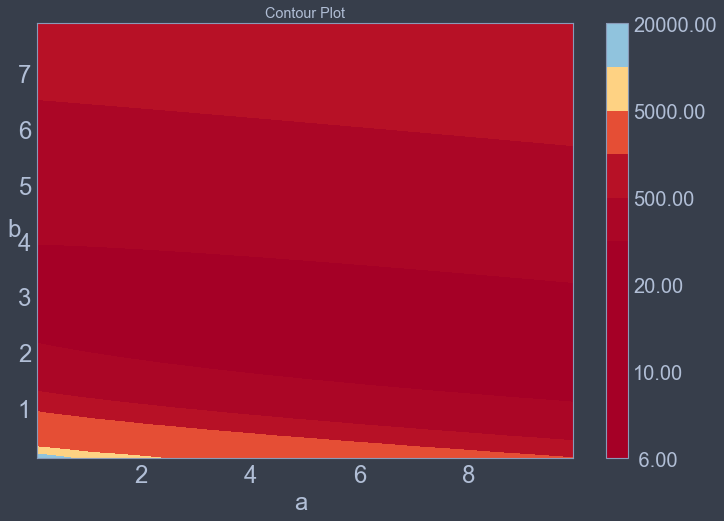

In [9]:
### let's see how large the change of our chi^2 is:

fig, ax = plt.subplots(1, 1,figsize=(12,8))
cp = plt.contourf(b, a, chi_square,levels = [ 6,7, 10, 14 ,20, 100, 500,1000, 5000, 10000, 20000],cmap='RdYlBu')
#plt.clabel(cp, inline=True, fontsize=24)
plt.title('Contour Plot')
plt.xlabel('a ',fontsize=24)
plt.ylabel('b',fontsize=24, rotation= 0)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

cbar = fig.colorbar(cp, format='%5.2f')
cbar.ax.tick_params(labelsize=20)

Text(0, 0.5, 'Quantity 2')

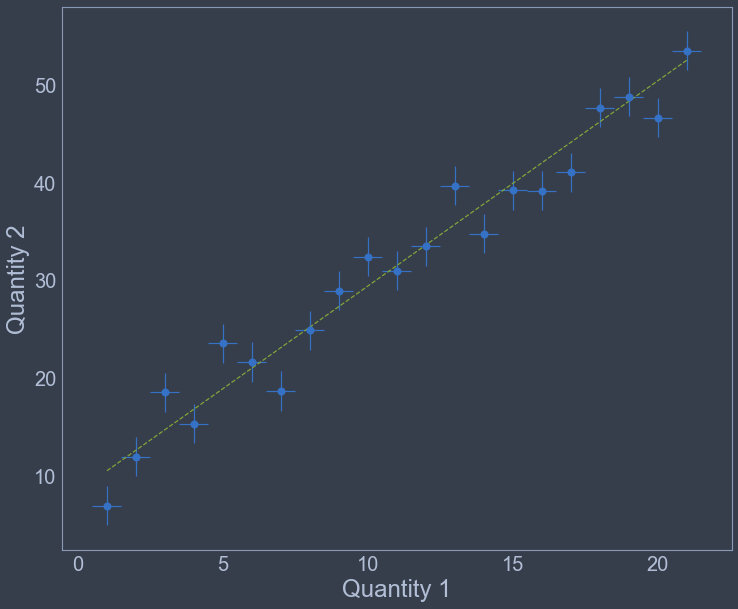

In [10]:
#use the minimum value to plot your data:
#-------------------------------------------------------

# find where chi_square is minimum:
q  = np.where( chi_square == np.min( chi_square ) )
# get the correct model for that minimum:
y2 = a[ q[0] ] * x + b[ q[ 1 ] ]


# make the plot:
plt.figure( figsize = ( 12, 10 ) )

# plot your data:
plt.errorbar( x, y, yerr = 2., xerr = 0.5,linestyle='none', marker='o', markersize = 8 )
# overplot your minimum chi_square model:
plt.plot( x, y2,linestyle = '--' )


plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.xlabel('Quantity 1', fontsize = 24 )
plt.ylabel('Quantity 2', fontsize = 24 ) 


In [11]:
#let's do the same but now using the chi_square ( (y-y_theory)**2/sigma**2) and find the minimum; assuming sigma = 2.

a = np.arange(0.1,8, 0.1)
b = np.arange(0.1, 10 , 0.1)

chi_square = np.zeros( ( len( a ), len( b ) ) )

sigma = 2

for i in range( len( a ) ):
    for j in range( len( b ) ):
        y_theory           = a[ i ] * x  + b[ j ]
        chi_square[ i, j ] = np.sum( ( y - y_theory )**2 / sigma**2 )


In [12]:
print(np.min(chi_square))

35.62852122402095


Text(0, 0.5, 'Quantity 2')

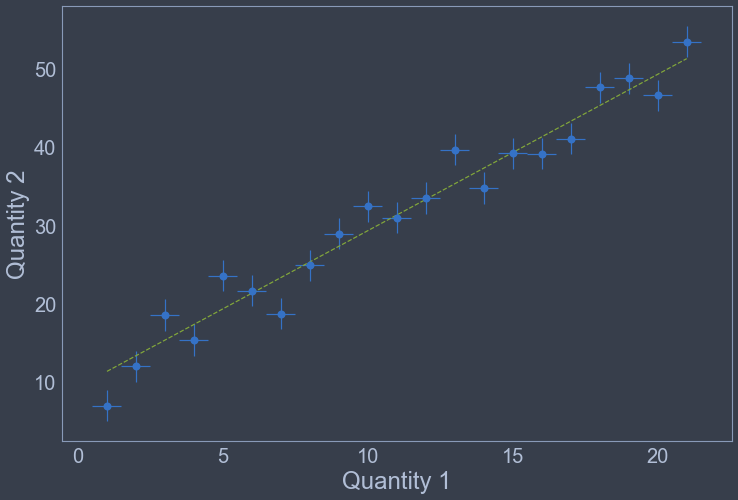

In [13]:

#use the minimum value to plot your data:
q  = np.where( chi_square == np.min( chi_square ) )
y2 = a[ q[ 0 ] ]*x + b[ q[ 1 ] ]


# make the plot:
plt.figure(figsize=(12,8))

plt.errorbar(x, y, yerr=sigma, xerr=0.5,linestyle='none', marker='o', markersize = 8)
plt.plot(x,y2,linestyle='--')


plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.xlabel('Quantity 1', fontsize = 24)
plt.ylabel('Quantity 2', fontsize = 24)


### You will be pleased to know that Python has done the work befor you, for you....Enter Scipy ( https://www.scipy.org/ ) and its stats package ( https://docs.scipy.org/doc/scipy/reference/stats.html )

### Scipy has packages that do data fitting for you:

- least_squares
- curve_fit
- chisquare


In [14]:
from scipy.stats import chisquare

In [15]:
# call chisquare with y_observations, y_expected_from_model

a = chisquare( y, f_exp = y2  )    # --> note different than the one we defined above

In [16]:
print( a )

Power_divergenceResult(statistic=6.402204880743637, pvalue=0.9982337506563729)


In [ ]:
## returns chi-squared test statistic and p-value of the test (here you see it is very likely that our 
## data would have been observed )

In [10]:
#We observed a target moving at times t and has a displacement s:

t = np.arange(1,22,2)
s = [ 11.80487185,  46.07654076 , 57.27329417 , 94.31029188, 146.48665845,
 185.33660777, 236.5500788,  318.94164082, 388.45874659, 475.7783416,
 555.86899163]


#Can you figure out if the target had a constant velocity u or if it was accelerating? Reminder: 
#if object had a constant speed: s = u * t + const
#if object had an acceleration: s = 0.5 * a* t + u * t + const
# assume a, const, u  < 40

In [11]:
#test constant velocity idea assuming constant error sigma = 12

a = np.arange( 0.1, 28 , 0.1 )       # parameter scan for u [m/s]
b = np.arange( 0.1, 40 , 0.5 )    # parameter scan for a [m/s2]
c = np.arange( 0.1, 40 , 0.1 )    # parameter scan for initial speed

chi_square = np.zeros( ( len( a ),len( c ) ) )

sigma = 12

for i in range( len( a ) ):
    for j in range( len( c ) ):
        s_theory           = a[ i ] * t + c[ j ]
        chi_square[ i, j ] = np.sum( ( s - s_theory )**2 / sigma**2 )

In [12]:
print(np.min(chi_square))

190.43428262269467


(array([223], dtype=int64), array([0], dtype=int64))


Text(0, 0.5, 'Distance')

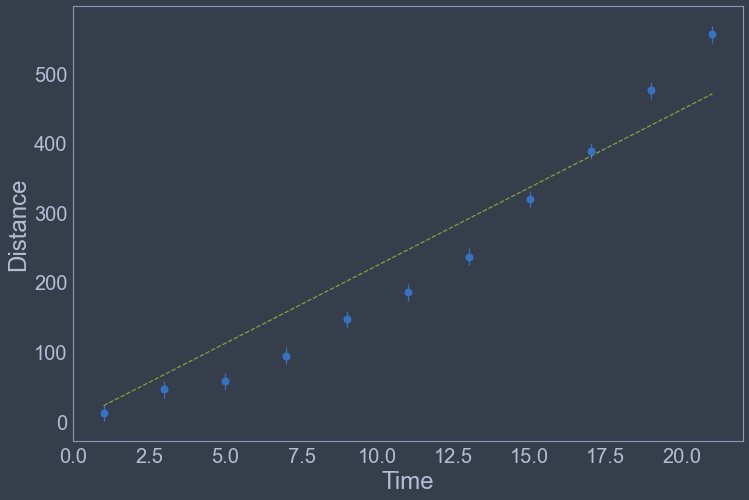

In [13]:
#use the minimum value to plot your data:
q = np.where( chi_square == np.min( chi_square ) )
print( q )
y2 = a[ q[ 0 ] ] * t + c [ q[ 1 ] ]


# make plot:
plt.figure(figsize = ( 12, 8 ) )

plt.errorbar( t, s, yerr=12.,linestyle='none', marker='o', markersize = 8 )
plt.plot( t, y2, linestyle='--' )

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.xlabel( 'Time'    , fontsize = 24)
plt.ylabel( 'Distance', fontsize = 24)

##awful fit! 

In [4]:
#Now let's assume that there is an acceleration:

chi_square = np.zeros( ( len( a ), len( b ), len( c ) ) )

sigma = 12

for i in range( len( a ) ):
    for j in range( len( b ) ):
        for k in range( len( c ) ):
            s_theory             = a[ i ] * t + 0.5 * b[ j ] * t**2 + c[ k ]
            chi_square[ i, j, k] = np.sum( ( s - s_theory )**2 / sigma**2 )


KeyboardInterrupt: 

In [ ]:
print(np.min(chi_square))

In [ ]:

#use the minimum value to plot your data:
q = np.where (chi_square == np.min( chi_square ) )
print( q )
y3 = a[ q[ 0 ] ] * t + 0.5 * b[ q[ 1 ] ] * t**2 + c[ q[ 2 ] ]
 
plt.figure( figsize = ( 12, 8 ) )

plt.errorbar(t, s, yerr=12.,linestyle='none', marker='o', markersize = 8)

plt.plot(t,y3,linestyle='--',color='blue',label ='with acceleration')

# overplot the previous best-fit model to compare:
plt.plot(t,y2,linestyle=':',color='red',label ='constant speed')

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.xlabel( 'Time'    , fontsize = 24 )
plt.ylabel( 'Distance', fontsize = 24 )

#smaller chisquare....model is better; good fit

### we now know that our car *was* accelerating!

### Of course, Scipy has already the tools for you to do the fitting:

In [5]:
from scipy.optimize import curve_fit

In [6]:
### set up your function for a car that accelerates:

def distance_with_acceleration_print(t, u, c, a):
    """Calculate the distance travelled with at a constant speed u for a known time
    and constant acceleration a."""
    
    print ("speed=",u, "acceleration=",a, 'constant=',c)
    return c + u* t + 0.5 * a * t**2 


In [7]:
t2, v2 = curve_fit( distance_with_acceleration_print, t , s, 
                       absolute_sigma = True, sigma = np.zeros( len( t ) ) + 12 )


speed= 1.0 acceleration= 1.0 constant= 1.0
speed= 1.0 acceleration= 1.0 constant= 1.0
speed= 1.0 acceleration= 1.0 constant= 1.0
speed= 1.0000000149011612 acceleration= 1.0 constant= 1.0
speed= 1.0 acceleration= 1.0 constant= 1.0000000149011612
speed= 1.0 acceleration= 1.0000000149011612 constant= 1.0
speed= 5.220519620817351 acceleration= 1.9931801582084632 constant= 10.931105372534423
speed= 5.220519698609155 acceleration= 1.9931801582084632 constant= 10.931105372534423
speed= 5.220519620817351 acceleration= 1.9931801582084632 constant= 10.931105535420587
speed= 5.220519620817351 acceleration= 1.993180187909162 constant= 10.931105372534423
speed= 5.220521177726987 acceleration= 1.9931800082152702 constant= 10.931100393644867


speed= 5.220521177726987 acceleration= 1.9931800082152702 constant= 10.931100393644867


Text(0, 0.5, 'Distance')

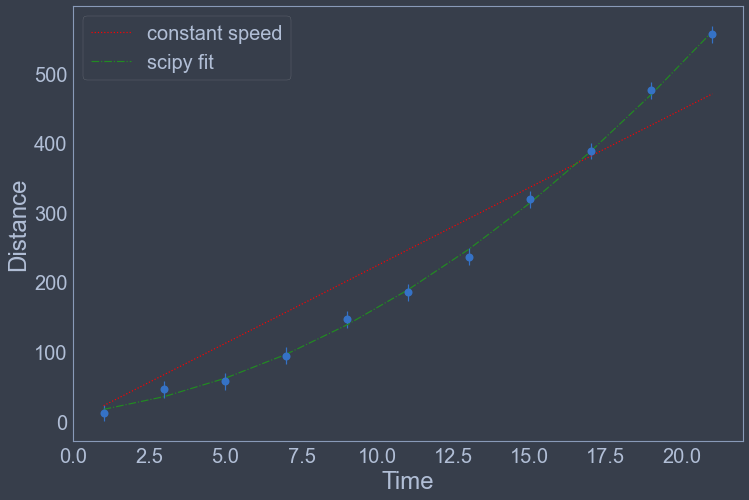

In [15]:
# let's compare the fits:


y4 = 5.22052 *t + 0.5 * 1.99318 * t**2 + 10.9311

plt.figure( figsize = ( 12, 8 ) )

plt.errorbar( t, s, yerr = 12., linestyle = 'none', marker='o', markersize = 8 )

#plot our hand-made fits:
#plt.plot( t, y3, linestyle = '--', color = 'blue', label = 'with acceleration')
plt.plot( t, y2, linestyle = ':' , color = 'red',  label ='constant speed' )

# plot the new fit
#plt.plot( t , y4, linestyle = '--', color = 'magenta', label = 'my funct fit' )

# or:
plt.plot( t, distance_with_acceleration_print( t, *t2), linestyle='-.', color='forestgreen',label ='scipy fit')

plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Distance', fontsize = 24)

#works nice on this example! Let's see more examples

In [16]:
#fit this sine function; 
#assume  w = c*np.sin(2*np.pi*t/P)+c

tw = np.arange(1,40,1)
w  = np.array([ 3.96838123,  1.2347536 , -0.28659576  ,0.16064933,  2.54715953,  1.27815974,
 -0.91929229 , 0.01300393 , 3.39636575 , 0.66465094, -1.41158169,  0.93323834,
  2.40457184,  0.79842956, -0.15261201 , 0.39569446,  2.97101324 , 0.47594539,
 -0.91273741 , 0.63033213,  3.57350699 , 1.56527141, -1.60574013 , 1.69854318,
  3.0131255   ,1.55600848, -1.67872146,  1.3382831 ,  3.21238516 , 0.32514177,
 -1.15733227 , 1.25311931,  2.4676918 ,  0.76427433, -1.43557062 , 1.70145249,
  2.50683363 , 0.43278036, -0.41304183])

In [17]:
a = np.arange( 0.1, 6, 0.1 )
b = np.arange( 0.1, 6 , 0.1 )
b = np.arange( 0.1, 6 , 0.1 )

chi_square = np.zeros( ( len( a ), len( b ), len( c ) ) )

sigma = .8

for i in range( len( a ) ):
    for j in range( len( b ) ):
        for k in range( len( c ) ):
            w_theory              = a[ i ] * np.sin( 2 * np.pi * tw / b[ j ] ) + c[ k ]
            chi_square[ i, j, k ] = np.sum( ( w - w_theory )**2 / sigma**2 )



Text(0, 0.5, 'wave')

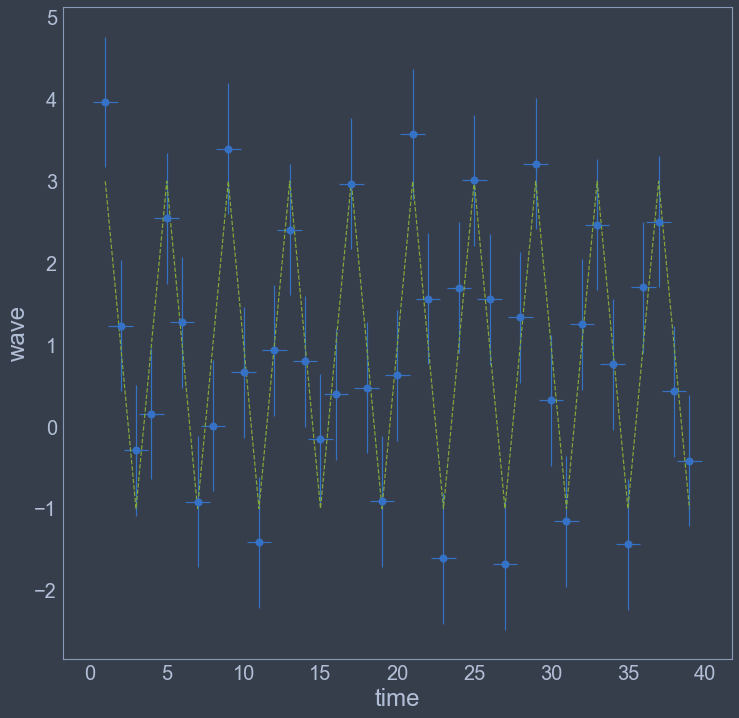

In [18]:
#use the minimum value to plot your data:
q = np.where(chi_square == np.min( chi_square ) )
#print( np.min(chi_square), a[ q[ 0 ] ], b[ q[ 1 ] ], c[ q[ 2 ] ] )

y2 = a[ q[ 0 ] ] * np.sin( 2 * np.pi * tw / b[ q[ 1 ] ] ) + c[ q[ 2 ] ]

plt.figure( figsize = ( 12 , 12 ) )

plt.errorbar(tw, w, yerr=sigma, xerr = 0.8,linestyle='none', marker='o', markersize = 8)
plt.plot(tw, y2,linestyle='--')


plt.xticks( fontsize =20)
plt.yticks( fontsize = 20)
plt.xlabel('time', fontsize = 24)
plt.ylabel('wave', fontsize = 24)


In [19]:
#is this a sine or cosine function?

tw = np.arange(1,40,1)
w  = np.array( [ 2.73155223e+00 , 3.17368658e+00 , 2.08082264e+00,  7.08391866e-01,
 -1.02196616e-01, -3.66845259e-01, -7.47889353e-01,  8.52096473e-01,
  2.13320321e+00,  2.73754612e+00,  2.36456758e+00,  1.66566340e+00,
 -6.78664125e-01, -1.12492492e-01, -1.92925580e-01,  1.59608994e+00,
  2.94364482e+00,  2.39214715e+00,  2.42116101e+00,  7.49597754e-01,
 -1.26025273e+00, -6.33402949e-01,  8.56344418e-02 , 1.84353600e+00,
  2.47992405e+00,  2.76758273e+00,  3.01939636e+00,  4.81326171e-01,
 -1.12837078e+00, -3.75890761e-02, -1.33917103e+00,  3.20806668e-01,
  1.83529070e+00,  2.03098421e+00,  2.33727279e+00,  2.72209809e-03,
 -6.47557862e-01, -4.87585375e-01, -3.13698707e-01] )



In [20]:
##Test 1:

#assume  w = c*np.sin(2*np.pi*t/P)+c


a = np.arange(0.1, 10, 0.1)
b = np.arange(0.1, 10 , 0.1)
b = np.arange(0.1, 10 , 0.1)

chi_square = np.zeros((len(a),len(b),len(c)))

sigma = .8

for i in range(len(a)):
    for j in range(len(b)):
        for k in range(len(c)):
            w_theory              = a[ i ] * np.sin( 2 * np.pi * tw / b[ j ] ) + c[ k ]
            chi_square[ i, j, k ] = np.sum( (w - w_theory )**2 / sigma**2 )




#use the minimum value to plot your data:
q = np.where(chi_square == np.min( chi_square ) )
#print(np.min(chi_square), a[q[0]], b[q[1]], c[q[2]])

y2 = a[q[0]] * np.sin(2*np.pi*tw/b[q[1]]) + c[q[2]]



##Test 2:

#assume  w = c*np.cos(2*np.pi*t/P)+c

a = np.arange(0.1, 10, 0.1)
b = np.arange(0.1, 10 , 0.1)
b = np.arange(0.1, 10 , 0.1)

chi_square = np.zeros( ( len( a ), len( b ), len( c ) ) )

sigma = .8

for i in range(len(a)):
    for j in range(len(b)):
        for k in range(len(c)):
            w_theory              = a[ i ] * np.cos(2*np.pi*tw/b[j]) + c[k]
            chi_square[ i, j, k ] = np.sum((w-w_theory)**2/sigma**2)




#use the minimum value to plot your data:
q= np.where(chi_square == np.min(chi_square))
#print(np.min(chi_square), a[q[0]], b[q[1]], c[q[2]])

y3 = a[q[0]] * np.cos(2*np.pi*tw/b[q[1]]) + c[q[2]]


KeyboardInterrupt: 

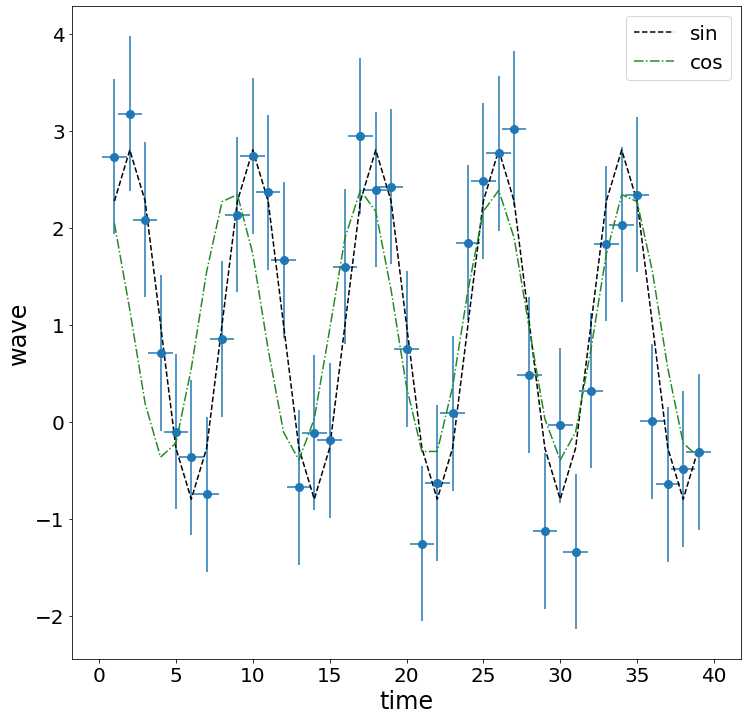

In [31]:
plt.figure(figsize=(12,12))

plt.errorbar(tw, w, yerr = sigma, xerr = 0.8, linestyle = 'none', marker = 'o', markersize = 8)
plt.plot(tw, y2,linestyle='--',color='black', label = 'sin' )
plt.plot(tw, y3,linestyle='-.',color='forestgreen', label = 'cos')


plt.xticks( fontsize = 20 )
plt.yticks( fontsize =  20 )
plt.xlabel( 'time', fontsize = 24 )
plt.ylabel( 'wave', fontsize = 24 )
plt.legend( fontsize =20 )

In [32]:
def wave_funct(tw, p, a, c):
    """test if your data are a sin function """
    
 
    return c+ a * np.sin(2*np.pi*tw/p)


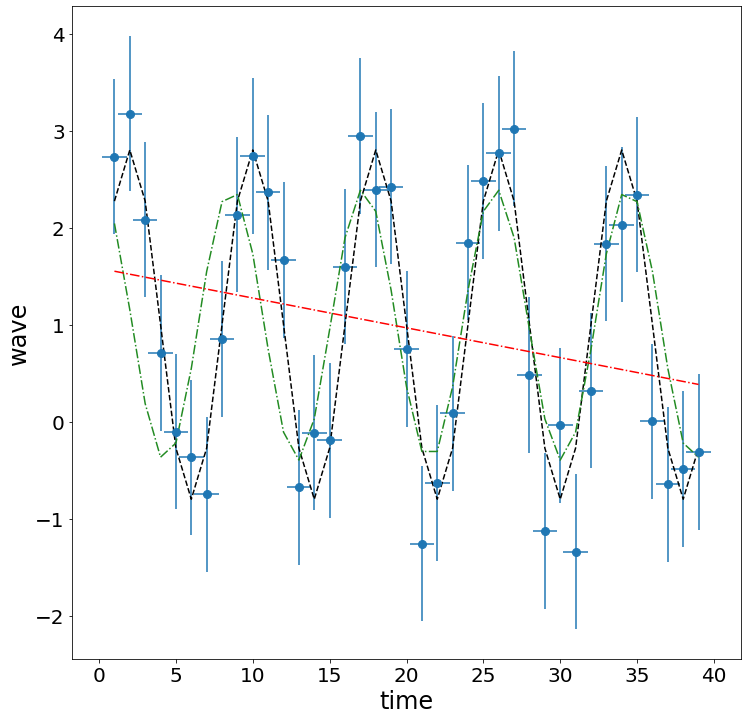

In [33]:
ts, ws = curve_fit(wave_funct, tw , w ) # like this it gets stuck in a local minimum


plt.figure(figsize=(12,12))

plt.errorbar(tw, w, yerr=sigma, xerr=0.8,linestyle='none', marker='o', markersize = 8)
plt.plot(tw, y2,linestyle='--',color='black')
plt.plot(tw, y3,linestyle='-.',color='forestgreen')
plt.plot(tw, wave_funct(tw, *ts),linestyle='-.',color='red',label ='scipy fit')


plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.xlabel('time', fontsize = 24)
plt.ylabel('wave', fontsize = 24)
plt.show()



#### Oops! What happened here? curve_fit got stuck in a local minimum.....

### Caution: some methods are prone to getting stuck in local (not the global) minima! 


# ----------------------------------------

# Interpolation and Extrapolation with Python

### Let's assume that we have two points (1,1) and (10,10):


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

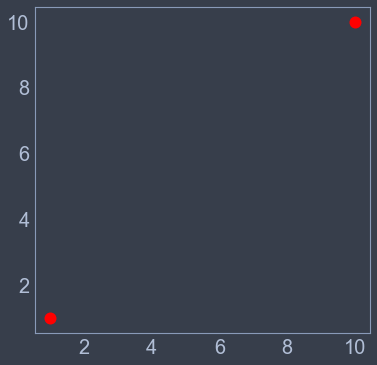

In [21]:
p1 = [1, 1]
p2 = [10, 10]

plt.figure( figsize = ( 6, 6 ) )
plt.plot( p1[ 0 ], p1[ 1 ], marker ='o', markersize = 12 , color = 'red')
plt.plot( p2[ 0 ], p2[ 1 ], marker ='o', markersize = 12 , color = 'red')
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )


### Assuming that the two are related, not random points (they follow some physical law) is there a way to figure out what happens between these two points? There's a lot of empty space between the two .....


### In this case it is a bit obvious that if I wanted to figure out the value of y for p3 with x = 5 it would be....and if I wanted the y of p4  with x = 7 it would be...


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

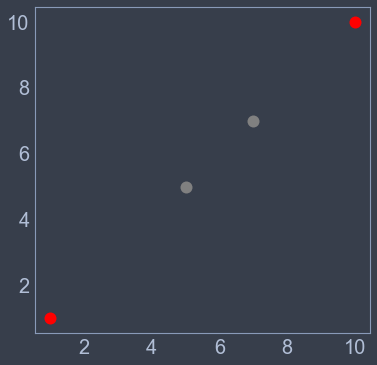

In [22]:
p3 = [ 5, 5 ]
p4 = [ 7, 7 ]

plt.figure( figsize = ( 6, 6 ) )

## plot the points:

plt.plot( p1[ 0 ], p1[ 1 ], marker ='o', markersize = 12, color = 'red')
plt.plot( p3[ 0 ], p3[ 1 ] , marker ='o', markersize = 12, color = 'gray') 
plt.plot( p4[ 0 ], p4[ 1 ] , marker ='o', markersize = 12, color = 'gray')
plt.plot( p2[ 0 ], p2[ 1 ], marker ='o', markersize = 12, color = 'red')
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )

### But how do you figure this out in a mathematically consistent way? INTERPOLATION


### If you have a function f=f(x), interpolation is the process of using known values f(x0),f(x1),f(x2),...,f(xN)  to find values for f(x) at points x != x1, x2,...,xN. 


### In general, you need to find a function L(x) called the interpolant which agrees with f at the known points and which you use to compute the desired values:

### the example here is an obvious $f(x) = x$  --> $y = x$  but let's solve it in the generic way:

### Let's assume that we have a linear interpolation of the form $y = a * (x-x_0) + b$  the slope a between two points $(x_1,y_1)$ and $(x_2, y_2)$ is  $ a = \frac{y_2-y_1}{x_2 -x_1}$ our b will be the point we want our line to start at $(x_1 , y_1)$ :

### So, let's interpolate between $p_1$ and $p_2$:

- find a and b based on your two points:

In [23]:
#find a and b based on your two points:
a = ( p2[ 1 ] - p1[ 1 ] ) / ( p2[ 0 ] - p1[ 0 ] )
b = p1[ 1 ]


#calculate y for x = 5 and x = 7:

print('Linear interpolation between p1 and p2 at point x = 5 gives:', a * ( 5 - p1[ 0 ] ) + b, '\n' )
print('Linear interpolation between p1 and p2 at point x = 7 gives:', a * ( 7 - p1[ 0 ] ) + b )



Linear interpolation between p1 and p2 at point x = 5 gives: 5.0 

Linear interpolation between p1 and p2 at point x = 7 gives: 7.0


### it works!

### Now let's try a bit more complex problems

### Assume we have arrays:

In [24]:
x = np.array( [ 0, 5, 9 , 11, 14 ] )
y = np.array( [ -0.5, 109.5, 197.5, 241.5, 307.5 ] )


#Can you figure out the value of y at the following values?
x1 = np.array( [ 2 , 4, 8 , 12.5 ] )

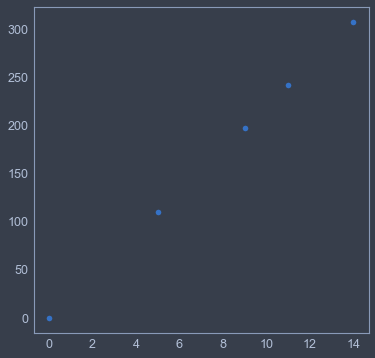

In [25]:
#Let's visualize the data first:

plt.figure( figsize = ( 6 , 6 ) )
plt.plot( x, y, marker = 'o', linestyle = 'none' )


In [26]:
# Linear interpolation seems a good choice:

y1 = np.zeros(4)

#Let's test it:
for i in range(4):
    a = ( y[ i+1 ] - y [ i ] ) / ( x[ i+1 ] - x[ i ] )
    print(a)

#---> constant slope seems promising...Let's put it in action:


22.0
22.0
22.0
22.0


In [27]:
# we will use a function : y = a* x + c
for i in range( 4 ):
    for j in range( 4 ):
        if ( x[ j-1 ] <= x1[ i ] ) & ( x[ j ] >= x1[ i ] ):
            a = ( y[ j ] - y [ j-1 ] ) / ( x[ j ] - x[ j-1 ] )

                
    y1[ i ] = a *  x1[ i ] - 0.5  # why ?
    
    print( x1[ i ], y1[ i ] )

2.0 43.5
4.0 87.5
8.0 175.5
12.5 274.5


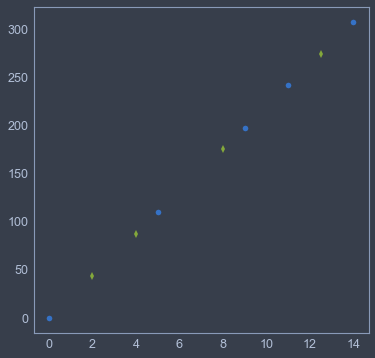

In [28]:
#Let's visualize the data again:

plt.figure( figsize = ( 6 , 6 ) )
plt.plot( x, y, marker = 'o', linestyle = 'none' )
plt.plot( x1, y1, marker = 'd', linestyle = 'none')

## Of course numpy already has a routine that does all of it for you: np.interp()
https://numpy.org/doc/stable/reference/generated/numpy.interp.html

In [29]:
y2 = np.interp( x1, x, y )

print( y2 )
print( y1 )

[ 43.5  87.5 175.5 274.5]
[ 43.5  87.5 175.5 274.5]


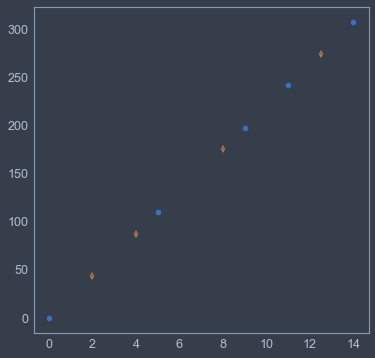

In [30]:
#Let's visualize the data again:

plt.figure( figsize = ( 6 , 6 ) )
plt.plot( x, y, marker = 'o', linestyle = 'none' )
plt.plot( x1, y1, marker = 'd', linestyle = 'none')
plt.plot( x1, y2, marker = '*', linestyle = 'none')


## But what happens where your data are not a linear function of x?


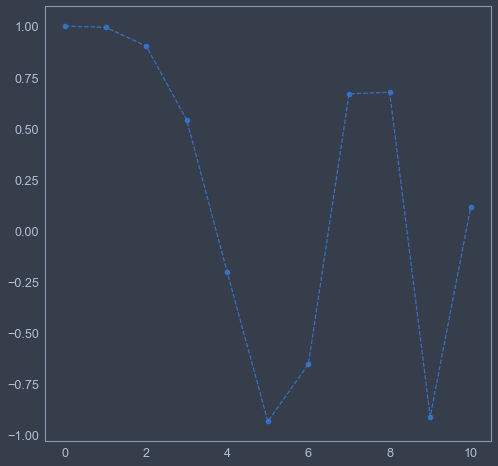

In [31]:

#example from https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
x = np.linspace( 0, 10, num = 11, endpoint = True )
y = np.cos( - x**2 / 9.0 )

#Let's plot it to see how it looks:
plt.figure( figsize = ( 8, 8 ) )
plt.plot( x, y, 'o', linestyle = '--' )

### you know that the underlying function is a cos, but if you just linearly connect the points you have they are a weird, sharp at points functions....so clearly, a linear interpolation between the two (numpy's linear interpolation) would not do a good job...

### In comes scipy:

In [32]:
from scipy.interpolate import interp1d


print(interp1d.__doc__)



    Interpolate a 1-D function.

    `x` and `y` are arrays of values used to approximate some function f:
    ``y = f(x)``. This class returns a function whose call method uses
    interpolation to find the value of new points.

    Parameters
    ----------
    x : (N,) array_like
        A 1-D array of real values.
    y : (...,N,...) array_like
        A N-D array of real values. The length of `y` along the interpolation
        axis must be equal to the length of `x`.
    kind : str or int, optional
        Specifies the kind of interpolation as a string or as an integer
        specifying the order of the spline interpolator to use.
        The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
        'slinear', 'quadratic', 'cubic', 'previous', or 'next'. 'zero',
        'slinear', 'quadratic' and 'cubic' refer to a spline interpolation of
        zeroth, first, second or third order; 'previous' and 'next' simply
        return the previous or next value of the

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

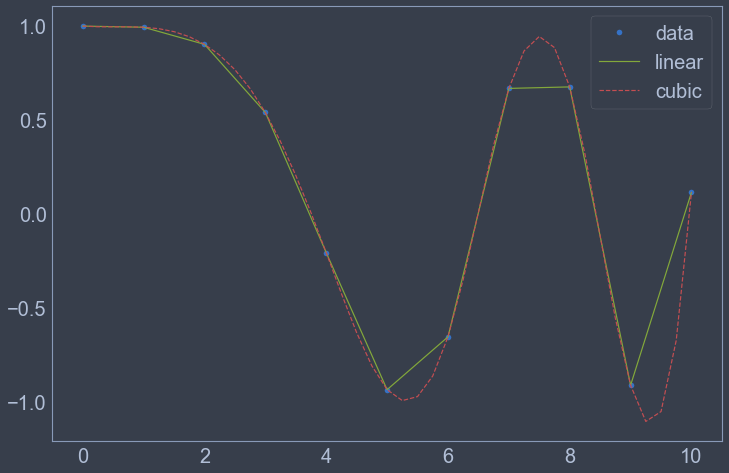

In [33]:
f  = interp1d( x, y)                    # linear interpolation
f2 = interp1d( x, y, kind = 'cubic' )   # cubic spline interpolation


xnew = np.linspace( 0, 10, num = 41, endpoint=True)

plt.figure( figsize = ( 12, 8 ) )

plt.plot( x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
# aka:
#plt.plot( x, y, marker = 'o', linestyle = 'none')
#plt.plot( xnew, f(xnew), linestyle = '-' )
#plt.plot( xnew, f2(xnew), linestyle = '--' )

plt.legend( ['data', 'linear', 'cubic'], loc = 'best', fontsize = 20 )
plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )


In [34]:
#this function is based on the cubic spline interpolation which you can also call directly:

from scipy.interpolate import  splrep,splev


In [35]:
#create your x and y arrays:
x = np.arange( 0, 2 * np.pi + np.pi / 4, 2 * np.pi / 8 )
y = np.sin( x )

#evaluate the spline derivatives (splrep) and the spline function (splev):   (FORTRAN powered ):
tck = splrep( x, y, s = 0 )
xnew = np.arange( 0, 2 * np.pi, np.pi / 50 )
ynew = splev( xnew, tck, der = 0 )


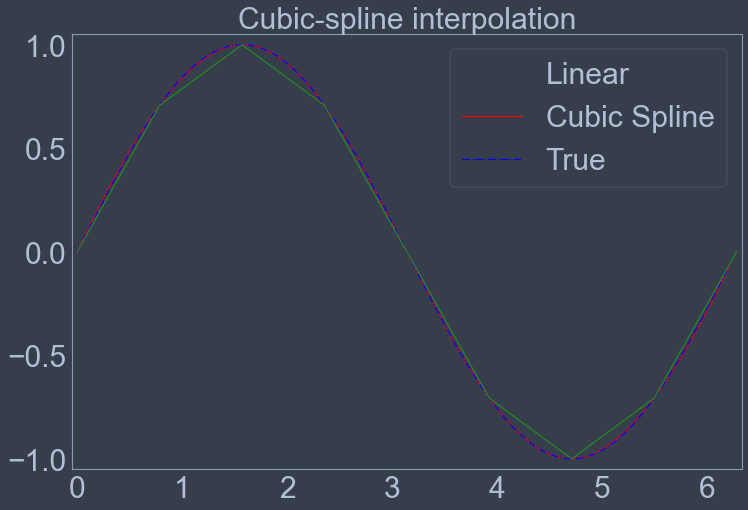

In [36]:
fig, ax = plt.subplots( figsize = ( 12, 8 ) )

plt.plot( x, y, 'x',linestyle = 'none')
plt.plot( xnew, ynew, color='red')
plt.plot( xnew, np.sin(xnew), linestyle = '-.',color='blue')
plt.plot( x, y,'forestgreen')
plt.legend( [ 'Linear', 'Cubic Spline', 'True' ],fontsize = 30 )
plt.axis( [ -0.05, 6.33, -1.05, 1.05 ] )
plt.title( 'Cubic-spline interpolation',fontsize = 30 )

ax.tick_params(axis='both', which='major', labelsize = 30 )


### splines are "a polynomial between each pair of table points, but one whose coefficients are determined 'slightly' nonlocally. The nonlocality is designed to guarantee global smoothness in the interpolated function up to some order of derivative"  (Numerical Recipes FORTRAN 77)
### A cubic spline is programmed to find the cubic polynomial $(a+ b*x + c*x^2 + d * x^3)$ within each interval (between your data points) that matches your data, and has continuous first and second derivatives at the knots 

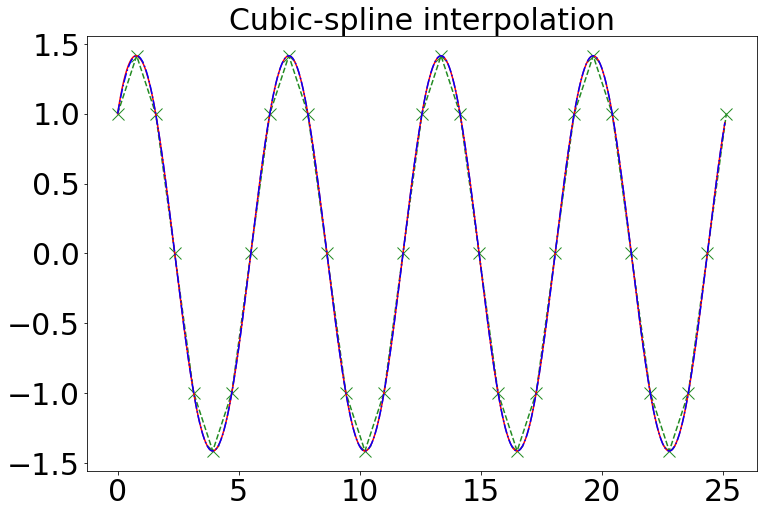

In [63]:
#let's try with a different dataset:

x = np.arange(0, 8*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)+np.cos(x)


#evaluate the spline derivatives (splrep) and the spline function (splev):   
tck = splrep(x, y, s=0)
xnew = np.arange(0, 8*np.pi, np.pi/50)
ynew = splev(xnew, tck, der=0)

fig, ax = plt.subplots( figsize = (12 , 8) )

plt.plot(x, y, 'x',color='forestgreen',linestyle='--',markersize=12)
plt.plot(xnew, ynew, color='red')
plt.plot(xnew, np.sin(xnew) +np.cos(xnew), linestyle = '-.',color='blue')

plt.title('Cubic-spline interpolation',fontsize = 30)

ax.tick_params(axis='both', which='major', labelsize=30)



### What if you have a 2D array and you want to interpolate between points in 2 dimensions? Then we have the bilinear interpolation:


In [64]:
from scipy.interpolate import  interp2d

In [65]:
#let's make our dataset:

x = np.arange( -5.01, 5.01, 0.25 )
y = np.arange( -5.01, 5.01, 0.25 )
xx, yy = np.meshgrid( x, y )

#Create a 2D array that uses xx , yy
z = np.sin( xx**2 + yy**2 ) / ( xx**2 + yy**2 )


In [66]:
# use the 2D interpolation
f = interp2d(x, y, z, kind='cubic')


(array([-0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,
         0.05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

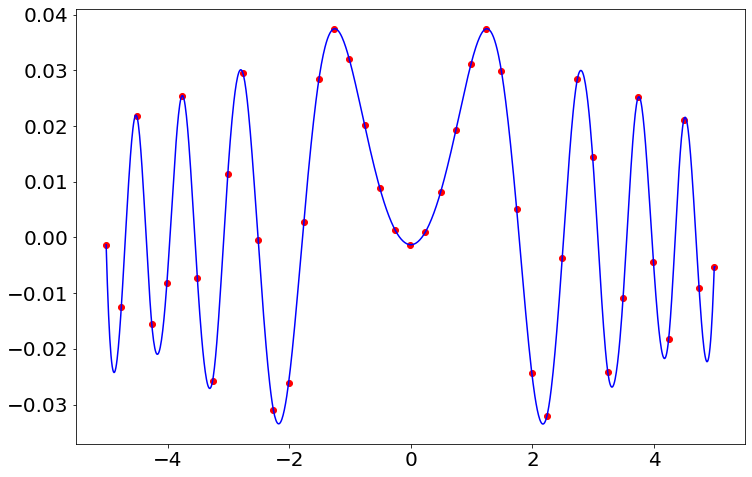

In [67]:
# make a finer x,y, z dataset:
xnew = np.arange( -5.01, 5.01, 1e-2 )
ynew = np.arange( -5.01, 5.01, 1e-2 )
znew = f( xnew, ynew )

plt.figure( figsize = ( 12, 8) )

plt.plot(x, z[0, :], 'ro')
plt.plot(xnew, znew[0, :], 'b-')
plt.xticks(fontsize =20 )
plt.yticks(fontsize =20 )


In [68]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
#Suppose we want to interpolate the 2-D function on a grid in [0, 1]x[0, 1]

def func(x, y):
     return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

#but we only know its values at 1000 data points:


points = np.random.rand( 1000, 2 )
values = func( points[ :, 0 ], points[ :, 1 ] )
#This can be done with griddata() – below we try out all of the interpolation methods:


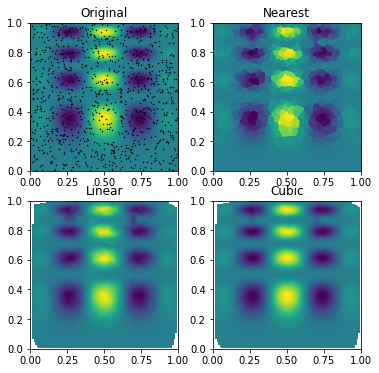

In [69]:
from scipy.interpolate import griddata

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

#One can see that the exact result is reproduced by all of the methods to some degree, but for this 
#smooth function the piecewise cubic interpolant gives the best results:


plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')

plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')

plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)


##  Extrapolation: estimate the value of a function y(x) outside the initial range [x1,x2] for which we have data


### Most basic version: linear extrapolation. You create a tangent line at the end of the known data and extend it  beyond that limit:

In [70]:
p1 = [1, 1]
p2 = [10, 10]

a = ( p2[1] - p1[1] ) / ( p2[0] - p1[0] )
b = p1[1]


#calculate y for x = 5 and x = 7:

print('Linear extrapolation to p4 at point x = 15 gives:', a * ( 15 - p1[ 0 ] ) + b,'\n')

Linear extrapolation to p4 at point x = 15 gives: 15.0 



### Linear extrapolation will only provide good results when used to extend the graph of an approximately linear function, or when you want a point not too far beyond the known data.

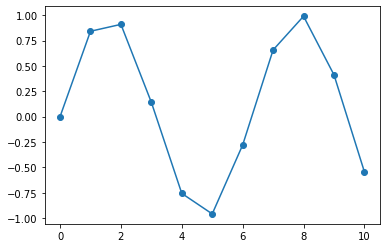

In [71]:
#Make a sin function between 0 and 10 and try to extrapolate to 12
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(x)


plt.plot(x,y,marker='o')

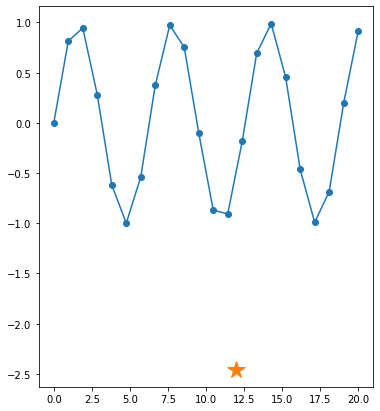

In [73]:
#we take the last two points x and y [9] and [10] and try to extrapolate at x = 12 :
y_pred = y[9] + ( 12 - x[ 9 ] ) / ( x[ 10 ] - x[ 9 ] ) * ( y[ 10 ] - y[ 9 ] )


x2 = np.linspace(0, 20, 22, endpoint=True)
y2 = np.sin( x2 )


plt.figure( figsize = ( 6, 7 ) )
plt.plot( x2, y2, marker = 'o' )
plt.plot( 12 , y_pred , marker = '*', markersize = 18 )  

In [74]:
# it (of course) fails!

### could we use interpolation as an extrapolation?

(-2.0, 2.0)

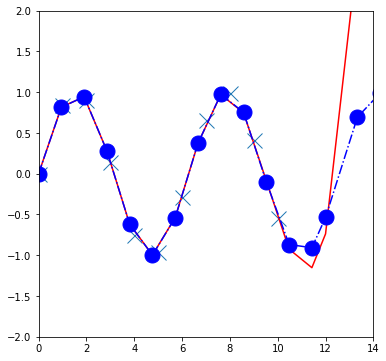

In [75]:
##from scipy.interpolate import  splrep,splev



x2[13] = 12.0

tck = splrep(x, y, s = 0 )
xnew = x2 
ynew = splev(xnew, tck, der =0)

fig, ax = plt.subplots(figsize = ( 6, 6 ) )

plt.plot( x, y, 'x',linestyle = 'none',markersize = 15)
plt.plot( xnew, ynew, color='red')
plt.plot( xnew, np.sin(xnew), linestyle = '-.',color='blue',marker='o',markersize = 15)
plt.xlim(0,14)
plt.ylim(-2,2)


### it seems to be doing OK-ish close to the initial space, but notice how it deviates  a lot very fast !


(-4.0, 2.0)

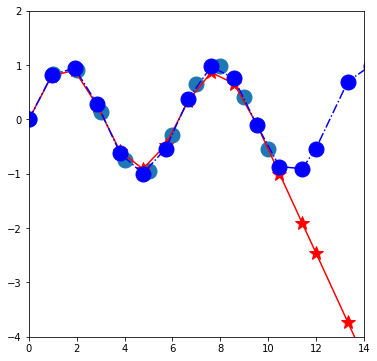

In [76]:
#try the interp1d of scipy:

f = interp1d(x, y , fill_value='extrapolate')

ynew2 = f( xnew )


fig, ax = plt.subplots(figsize = ( 6, 6 ) )

plt.plot( x, y, 'o',linestyle = 'none',markersize = 15)
plt.plot( xnew, ynew2, color='red', marker = '*',markersize = 15)
plt.plot( xnew, np.sin(xnew), linestyle = '-.',color='blue',marker='o',markersize = 15)
plt.xlim( 0, 14 )
plt.ylim( -4, 2 )

# losing it fast

### how about exponential functions? 

(0.0, 14.0)

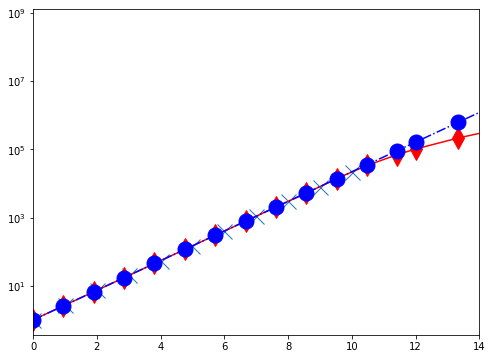

In [77]:

x = np.linspace( 0, 10, 11, endpoint=True)
y = np.exp( x )

x2[13] = 12.0

tck = splrep( x, y, s = 0 )
xnew = x2 
ynew = splev(xnew, tck, der=0)

fig, ax = plt.subplots(figsize = ( 8 , 6 ) )


#semilogy asks the plot to be logarithmic scale on the y axis (also have semilogx; loglog....)

plt.semilogy( x, y, 'x',linestyle = 'none',markersize = 15)
plt.semilogy( xnew, ynew, color='red', marker='d',markersize = 15)
plt.semilogy( xnew, np.exp(xnew), linestyle = '-.',color='blue',marker='o',markersize = 15)
plt.xlim(0,14)



(0.0, 1000000.0)

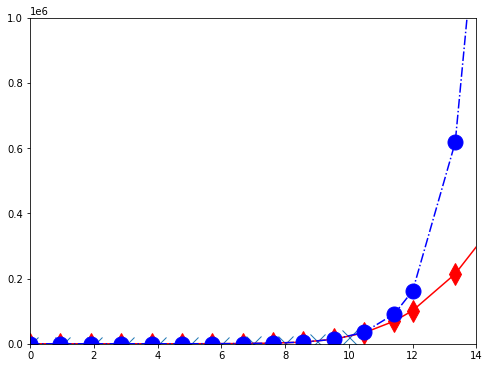

In [78]:

##versus the full plot:

plt.figure(figsize = ( 8, 6 ) )
plt.plot( x, y, 'x',linestyle = 'none',markersize = 15)
plt.plot( xnew, ynew, color='red', marker='d',markersize = 15)
plt.plot( xnew, np.exp(xnew), linestyle = '-.',color='blue',marker='o',markersize = 15)
plt.xlim( 0,14 )
plt.ylim( 0,1e6 )


In [79]:
from scipy.interpolate import InterpolatedUnivariateSpline

# given values
xi = np.linspace(1,100,45)
yi = np.sin(xi) 

# positions to inter/extrapolate
x = np.linspace(0, 104, 50)  #-->test the further point; the more you push it the more you diverge from the real value

# spline order: 1 linear, 2 quadratic, 3 cubic ... 
order = 1

# do inter/extrapolation
s = InterpolatedUnivariateSpline(xi, yi, k=order)
y = s(x)

(-2.0, 2.0)

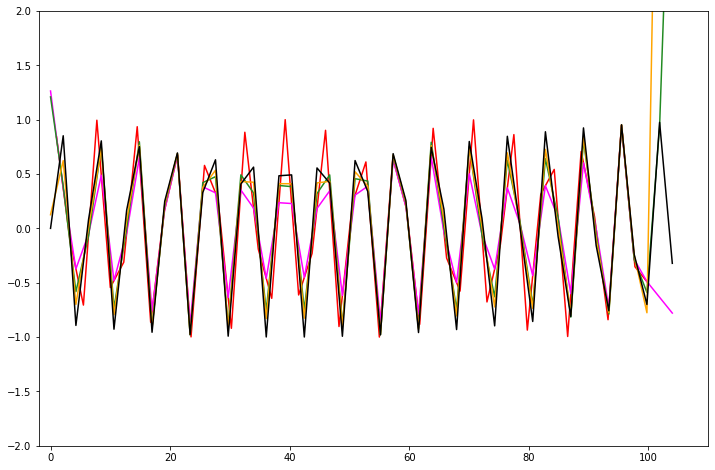

In [80]:
# example showing the interpolation for linear, quadratic and cubic interpolation
plt.figure(figsize = ( 12 , 8 ) )

plt.plot(xi, yi, color='red' )

clr = ['blue', 'magenta', 'forestgreen', 'orange']


for order in range(1, 4):
    s = InterpolatedUnivariateSpline(xi, yi, k=order)
    y = s(x)
    plt.plot(x, y, color = clr[order])

plt.plot( x, np.sin(x),color='black')
plt.xlim( -2, 110 )
plt.ylim( -2, 2 )


## Practicum

### 1. Read practise_reading_numpy.dat from demos/ in a numpy array. Assign its columns to arrays x, y, z, w and q. Plot q(x). Your observations could be a function of the form:

- sin( 2 $\pi \frac{x}{ P}$ )*A
- cos( 2 $\pi \frac{x}{ P}$) *A
- sin( 2 $\pi  \frac{x}{ P}$ ) * $\log_{10}(\frac{x}{ B}) $* A
- cos( 2 $\pi \frac{x}{ P}$) * $\log_{10}( \frac{x}{ B} )$ * A

with P, A and B constants. Which is the model that best describes your observations q(x) ? what about z(x) ?

### 2. You have observed thirty people and registered their weight [cm] and height [kg] (see below). Assuming that these two are directly related (i.e., ignore other parameters that could affect the person's weight), can you use these data to predict the most probable weight of someone 187cm tall? Can you predict the height of someone that weighs 120kg?

In [81]:
height = np.array( [ 165, 172, 184, 154, 193, 177, 164, 210, 181, 158, 
                     176, 169, 142, 201, 195, 183, 174, 150, 161, 190 ] )
weight = np.array( [ 60 , 64, 76, 55, 79, 69, 57, 100, 70, 58, 
                     68 , 59, 46, 90, 85, 76, 66,  51, 58, 81  ] )

### 3. Assume sphere with radius R = 1,000 m and density $\rho (r) = \rho_0 (1 - \alpha \frac{r}{R}) $, where $\rho_0, \alpha$ are constants. What is the total mass of the sphere if you know that:

$M_{tot} = \int_0^{2\pi} \int_0^{\pi} \int_0^R \rho(r) r^2 \sin \phi dr d\phi d\theta $ . 

You can assume $R$ = 8.913e7 m , $\alpha = 1.13$ and $\rho_0$ = 5320 kg/m3


### 4. Create a class forest_basket that contains all information about my basket when I go harvesting. The class should contain information about the apples, black_berries, and mushrooms I collect, as well as the weight of the basket. 

### Create an initialization function that sets all these parameters to zero, unless otherwise specified. 

### Create a method weight_of_basket that prints an informative statement about the weight of my basket assuming an average weight of 0.5, 0.2 and 0.1 kg for each apple, black berry and mushroom correspondingly (assume a 0kg weight for the actual basket itself). 

### Finally, create a method can_I_lift_it that returns a True or False, depending on whether I can or cannot lift the basket. The maximum weight I can carry  (maximum_weight_carry) is 11 kg. 

 

### Create a basket that has 12 apples, 80 black berries  and 18 mushrooms. What is the total weight of my basket (use appropriate command to print it)? Can I carry it (use appropriate command to get a True/False)?

 

### I gave the basket to a friend that can only carry a maximum of 6kg and, depending on how you build it, now my class may not function as I want anymore. What change can you make to the class to make the maximum_weight_carry a parameter that I can adapt when necessary without changing the class itself (so a constant parameter I can change from my main program)?

